## Business Understanding

The data used in this analysis is from the "Airline Passenger Satisfaction" dataset sourced from Kaggle.  https://www.kaggle.com/binaryjoker/airline-passenger-satisfaction.  
        
The purpose of this dataset is to measure and record the factors that contribute to customer satisfaction for passengers on airlines.  This data was collected so airlines can continue to contribute to service quality improvements, meet and exceed customer expectations and stay competitive in the marketplace.  The dataset can be leveraged into a supervised machine learning classification model that can predict customer satisfaction for this dataset set as well future flights based on attributes and datapoints recieved. 
        
Such models that could be used for this analysis include logistic regression, random forests, naive-bayes, KNN or LDA/QDA.  The outcome of such a model would be to correctly predict a flight's satisfaction description from  training/test set split or k-fold cross validation while maintaining high and consitent measurenments for overall model accuracy, sensitivity and specificity.  Cross validation steps ensure that the model was not overfit based on training data and will work for future data that has either not yet been collected or where all other attributes are known but not satisfaction.  By maximizing both sensitivity and specificity the model is robust to a skewed sample or dataset, the amount of false posotives is just as important as the ones that were matched correctly.  In addition, By running several classification model types we can ensure that multile approaches were taken and tested out before a model its accuracy statistics are deemed final.

Import Airline passenger data from github into Ipython notebook

In [1]:
import pandas as pd
import numpy as np
airline_df = pd.read_csv('https://raw.githubusercontent.com/wangrenfeng0/Machine-Learning-I/main/airline_passenger_satisfaction.csv') # read in the csv file

In [2]:
airline_df.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Break Apart variables by categorical and continuous

In [13]:
# let's start by first changing the numeric values to be floats
airline_continuous_features = ['age', 'flight_distance', 
                       'departure_delay_in_minutes', 'arrival_delay_in_minutes']

# and the oridnal values to be integers
airline_ordinal_features = ['inflight_wifi_service','departure_arrival_time_convenient','gate_location',
                    'food_and_drink','online_boarding','seat_comfort','inflight_entertainment',
                    'onboard_service',  'leg_room_service' ,'baggage_handling' ,'checkin_service' ,  
                     'inflight_service','cleanliness']

# we won't touch these variables, keep them as categorical
airline_categ_features = ['Gender','customer_type','type_of_travel','customer_class','satisfaction'];


airline_continuous_features_satis = ['age', 'flight_distance', 
                       'departure_delay_in_minutes', 'arrival_delay_in_minutes','satisfaction']




airline_nonflight_ordinal_features_satis = ['gate_location','departure_arrival_time_convenient',
                    'online_boarding','baggage_handling' ,'checkin_service' , 'satisfaction']





Summary of Variables

from airline_df.info(): 
-5 character variables, the remaining 19 integar or float
-missing/null data in arrival_delay_in_minutes



In [9]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

In [5]:
airline_df.describe()

,Unnamed: 0,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64939.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32469.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64939.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97409.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129879.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [10]:
airline_df[airline_categ_features].describe()

,Gender,customer_type,type_of_travel,customer_class,satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65899,106100,89693,62160,73452


<ipython-input-9-72489f42750f>:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(vars_to_plot_separate)/2,
<ipython-input-9-72489f42750f>:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(vars_to_plot_separate)/2,
<ipython-input-9-72489f42750f>:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(vars_to_plot_separate)/2,
<ipython-input-9-72489f42750f>:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(vars_to_plot_separate)/2,


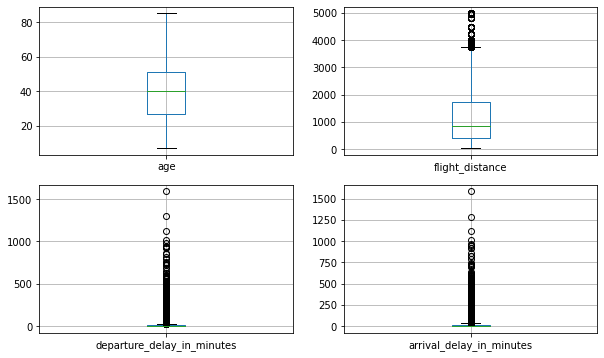

In [9]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

vars_to_plot_separate = [['age'],
                         ['flight_distance'],
                         ['departure_delay_in_minutes'], ['arrival_delay_in_minutes']]
plt.figure(figsize=(10, 6))

for index, plot_vars in enumerate(vars_to_plot_separate):
    plt.subplot(len(vars_to_plot_separate)/2, 
                2, 
                index+1)
    ax = airline_df.boxplot(column=plot_vars)
    
plt.show()



<AxesSubplot:xlabel='customer_class', ylabel='leg_room_service'>

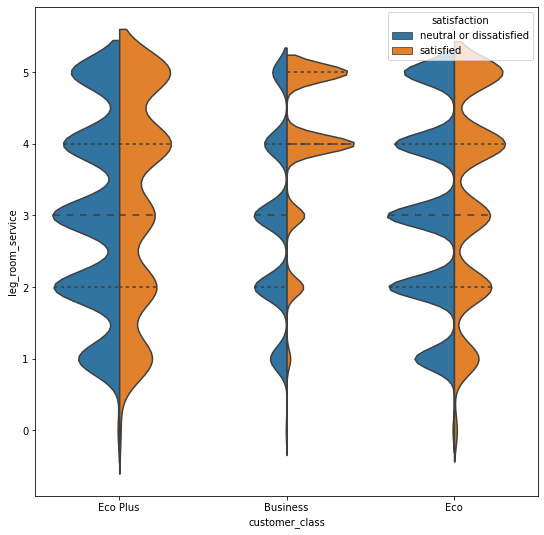

In [10]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings



f, ax = plt.subplots(figsize=(9, 9))

sns.violinplot(x="customer_class", y="leg_room_service", hue="satisfaction", data=airline_df, 
               split=True, inner="quart")




<AxesSubplot:xlabel='customer_type', ylabel='flight_distance'>

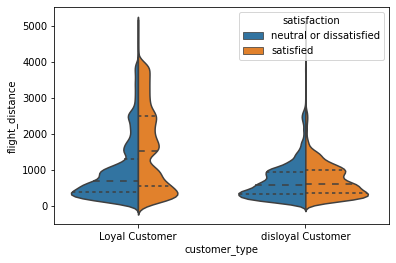

In [12]:
sns.violinplot(x="customer_type", y="flight_distance", hue="satisfaction", data=airline_df, 
               split=True, inner="quart")

<AxesSubplot:xlabel='cleanliness', ylabel='leg_room_service'>

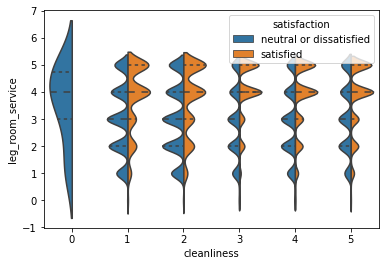

In [13]:
sns.violinplot(x="cleanliness", y="leg_room_service", hue="satisfaction", data=airline_df, 
               split=True, inner="quart")

[5 points] Are there other features that could be added to the data or created from
existing features? Which ones?

There are plenty of other features that could be in this dataset to better determine and assess customer satisfaction.  A key factor is any satisfaction analysis is price, there could be a continuious variable that shows the price of the flight or an ordinal ranking 1 to 5 about the price of flight according to the customer.

Other key features could be useful would be airline used, type of aircraft, starting and ending destination.  Satisfaction could be highly correlated or clustered by the inclusion of these additional fields.


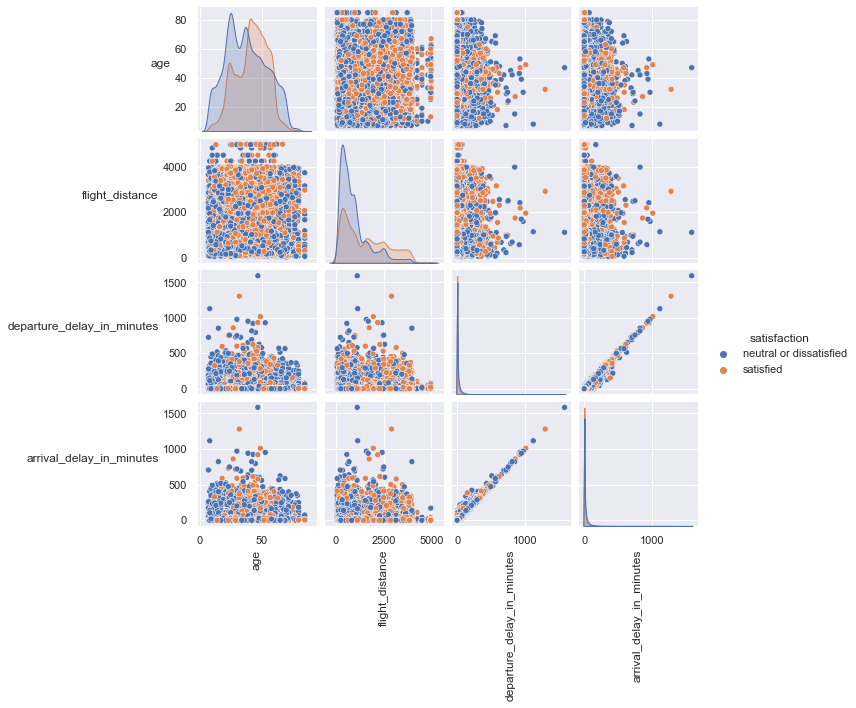

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

g = sns.pairplot(airline_df[airline_continuous_features_satis], hue="satisfaction", height=2)
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

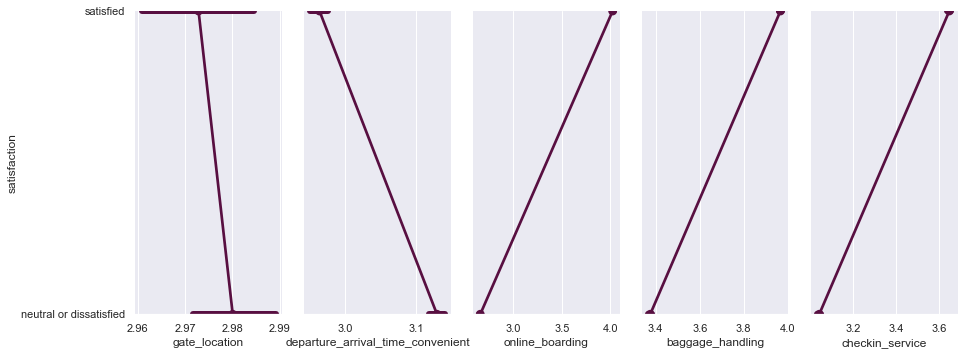

In [19]:

import seaborn as sns

g = sns.PairGrid(airline_df, y_vars="satisfaction",
                 x_vars=['gate_location','departure_arrival_time_convenient',
                    'online_boarding','baggage_handling' ,'checkin_service' ],
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1, errwidth=6, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

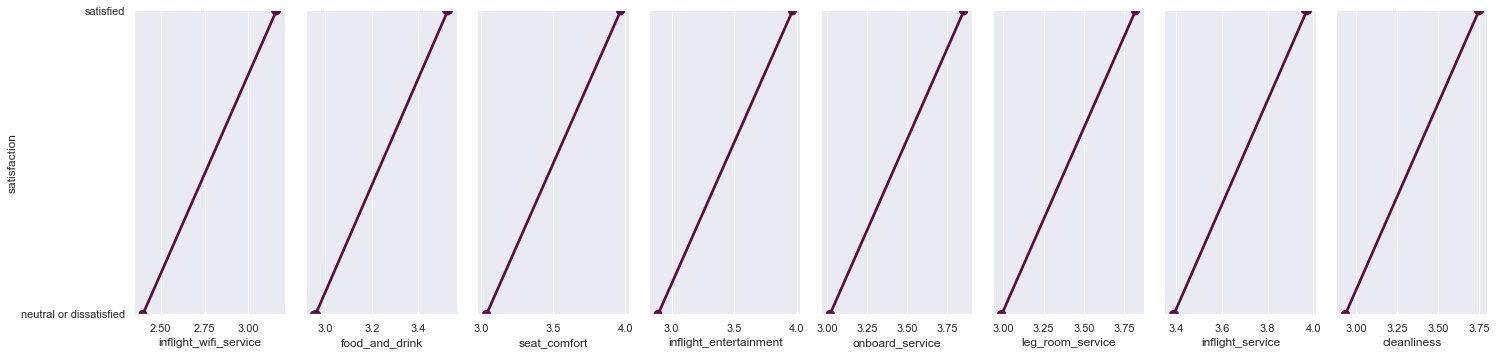

In [20]:
import seaborn as sns

g = sns.PairGrid(airline_df, y_vars="satisfaction",
                 x_vars=['inflight_wifi_service','food_and_drink','seat_comfort','inflight_entertainment',
                    'onboard_service',  'leg_room_service','inflight_service','cleanliness'],
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1, errwidth=6, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)